### importing dataset

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\adapa\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# data cleaning  & EDA

In [2]:
print(df.shape)

(768, 9)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

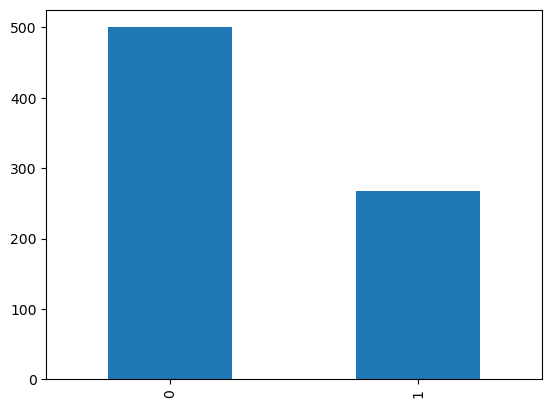

In [5]:
df['Outcome'].value_counts(sort=True).plot(kind='bar')

In [6]:
df['Outcome'].value_counts(sort=True)

0    500
1    268
Name: Outcome, dtype: int64

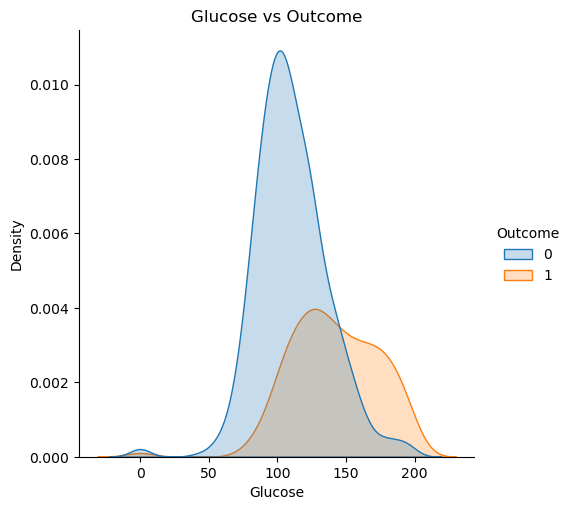

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x='Glucose', hue='Outcome', kind='kde', fill=True)
plt.title('Glucose vs Outcome')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.show()

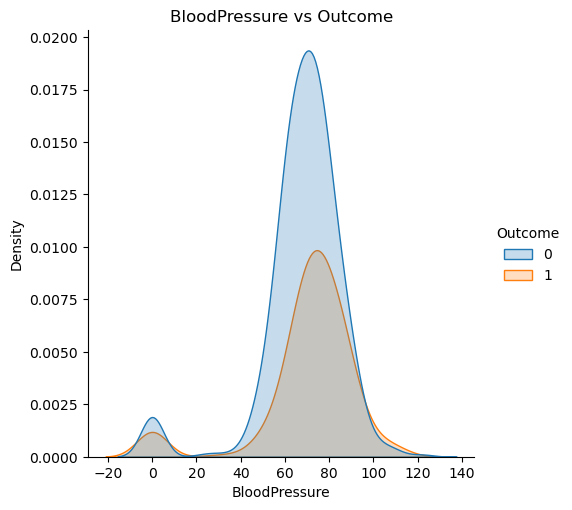

In [8]:
sns.displot(data=df, x='BloodPressure', hue='Outcome', kind='kde', fill=True)
plt.title('BloodPressure vs Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.show()

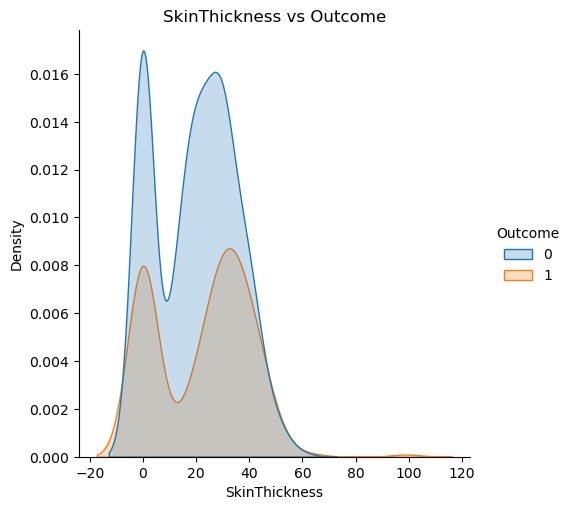

In [9]:
sns.displot(data=df, x='SkinThickness', hue='Outcome', kind='kde', fill=True)
plt.title('SkinThickness vs Outcome')
plt.xlabel('SkinThickness')
plt.ylabel('Density')
plt.show()

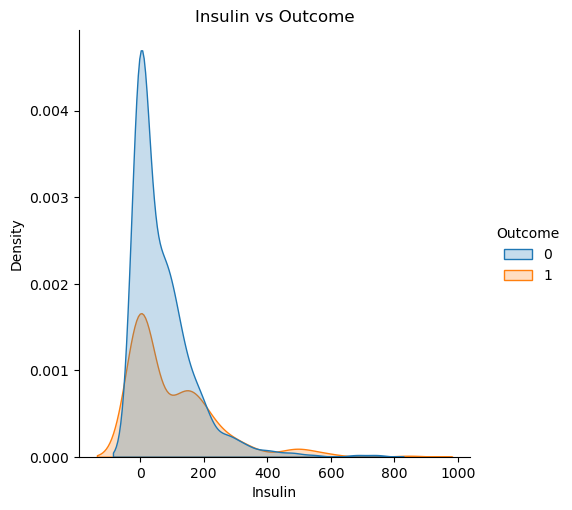

In [10]:
sns.displot(data=df, x='Insulin', hue='Outcome', kind='kde', fill=True)
plt.title('Insulin vs Outcome')
plt.xlabel('Insulin')
plt.ylabel('Density')
plt.show()

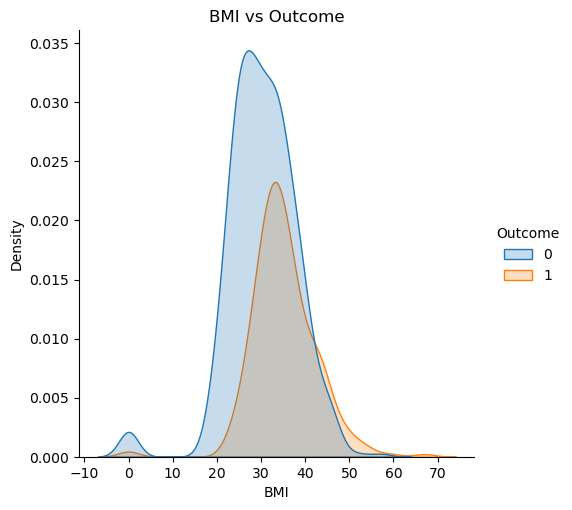

In [11]:
sns.displot(data=df, x='BMI', hue='Outcome', kind='kde', fill=True)
plt.title('BMI vs Outcome')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

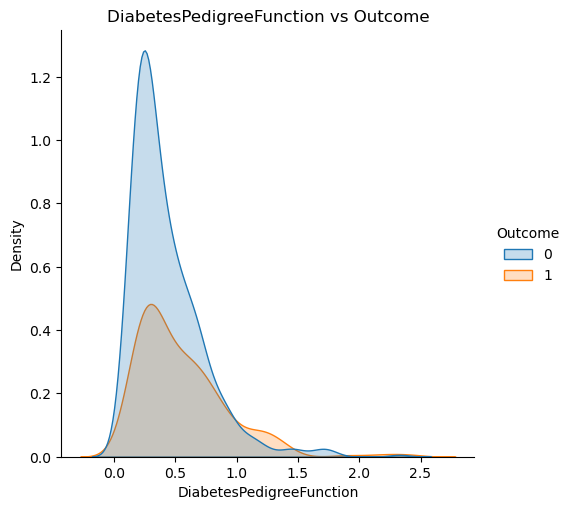

In [12]:
sns.displot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kind='kde', fill=True)
plt.title('DiabetesPedigreeFunction vs Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Density')
plt.show()

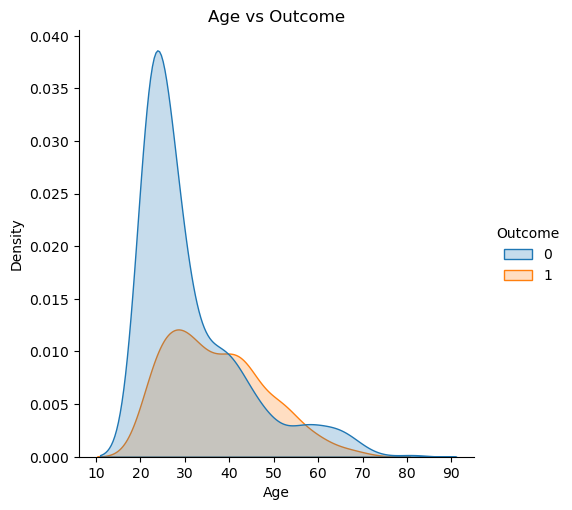

In [13]:
sns.displot(data=df, x='Age', hue='Outcome', kind='kde', fill=True)
plt.title('Age vs Outcome')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Train and Test split

In [14]:
X = df.drop(["Outcome"],axis = 1)
y = df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
X_train_pp, X_test_pp, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("shape of X_train:",X_train_pp.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_train:",X_test_pp.shape)
print("shape of y_train:",y_test.shape)

shape of X_train: (537, 8)
shape of y_train: (537,)
shape of X_train: (231, 8)
shape of y_train: (231,)


# Model Training and Testing

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d", cmap='YlGnBu')
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## K-Nearest Neighbors

KNN Train accuracy_score: 0.7932960893854749
KNN Train f1_score: 0.790243607318807
KNN Test accuracy_score: 0.7445887445887446
KNN Test f1_score: 0.7433649604922065
KNN train confusion_matrix


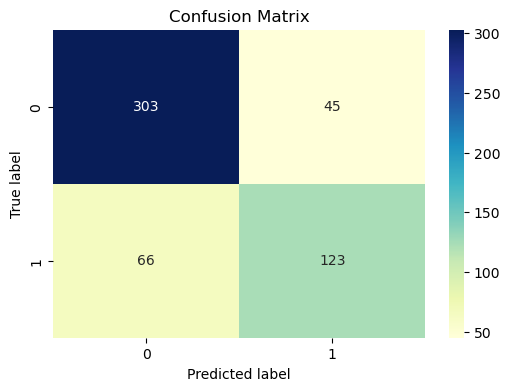

KNN test confusion_matrix


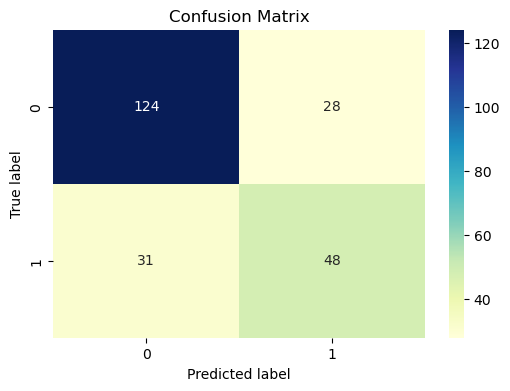

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_pp, y_train)

y_predict_train_knn = knn_classifier.predict(X_train_pp)
y_predict_test_knn = knn_classifier.predict(X_test_pp)

print("KNN Train accuracy_score:", accuracy_score(y_train, y_predict_train_knn))
print("KNN Train f1_score:", f1_score(y_train, y_predict_train_knn, average='weighted'))
print("KNN Test accuracy_score:", accuracy_score(y_test, y_predict_test_knn))
print("KNN Test f1_score:", f1_score(y_test, y_predict_test_knn, average='weighted'))

print("KNN train confusion_matrix")
cm_knn_train = confusion_matrix(y_train, y_predict_train_knn)
draw_confusion_matrix(cm_knn_train)

print("KNN test confusion_matrix")
cm_knn_test = confusion_matrix(y_test, y_predict_test_knn)
draw_confusion_matrix(cm_knn_test)

## LogisticRegression

Logistic Regression Train accuracy_score: 0.7635009310986964
Logistic Regression Train f1_score: 0.756171467449886
Logistic Regression Test accuracy_score: 0.8051948051948052
Logistic Regression Test f1_score: 0.7995578089621975
Logistic Regression train confusion_matrix


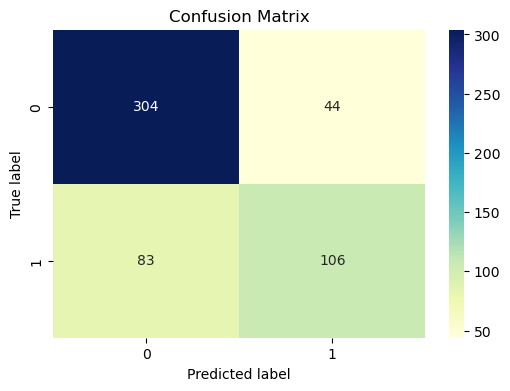

Logistic Regression test confusion_matrix


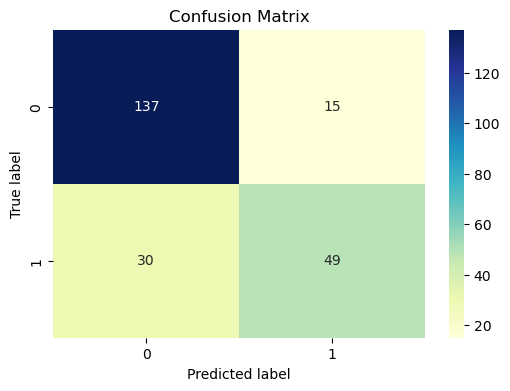

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_pp, y_train)

y_predict_train_lr = logistic_regression.predict(X_train_pp)
y_predict_test_lr = logistic_regression.predict(X_test_pp)

# Print evaluation metrics
print("Logistic Regression Train accuracy_score:", accuracy_score(y_train, y_predict_train_lr))
print("Logistic Regression Train f1_score:", f1_score(y_train, y_predict_train_lr, average='weighted'))
print("Logistic Regression Test accuracy_score:", accuracy_score(y_test, y_predict_test_lr))
print("Logistic Regression Test f1_score:", f1_score(y_test, y_predict_test_lr, average='weighted'))

print("Logistic Regression train confusion_matrix")
cm_lr_train = confusion_matrix(y_train, y_predict_train_lr)
draw_confusion_matrix(cm_lr_train)

print("Logistic Regression test confusion_matrix")
cm_lr_test = confusion_matrix(y_test, y_predict_test_lr)
draw_confusion_matrix(cm_lr_test)


## Support Vector Machine (SVM)

SVM Train accuracy_score: 0.7635009310986964
SVM Train f1_score: 0.7508710196444062
SVM Test accuracy_score: 0.7705627705627706
SVM Test f1_score: 0.7547638245312664
SVM train confusion_matrix


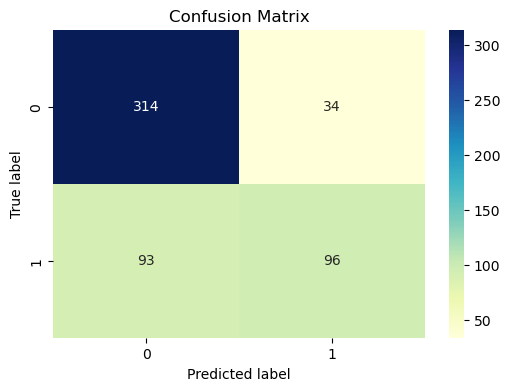

SVM test confusion_matrix


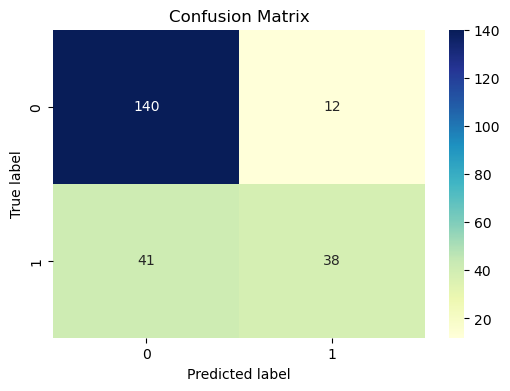

In [20]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train_pp, y_train)
y_predict_train_svm = svm_classifier.predict(X_train_pp)
y_predict_test_svm = svm_classifier.predict(X_test_pp)

print("SVM Train accuracy_score:", accuracy_score(y_train, y_predict_train_svm))
print("SVM Train f1_score:", f1_score(y_train, y_predict_train_svm, average='weighted'))
print("SVM Test accuracy_score:", accuracy_score(y_test, y_predict_test_svm))
print("SVM Test f1_score:", f1_score(y_test, y_predict_test_svm, average='weighted'))

print("SVM train confusion_matrix")
cm_svm_train = confusion_matrix(y_train, y_predict_train_svm)
draw_confusion_matrix(cm_svm_train)

print("SVM test confusion_matrix")
cm_svm_test = confusion_matrix(y_test, y_predict_test_svm)
draw_confusion_matrix(cm_svm_test)


## Gradient Boosting Classifier

Gradient Boosting Train accuracy_score: 0.9404096834264432
Gradient Boosting Train f1_score: 0.9399377956736379
Gradient Boosting Test accuracy_score: 0.7922077922077922
Gradient Boosting Test f1_score: 0.7884965783054955
Gradient Boosting train confusion_matrix


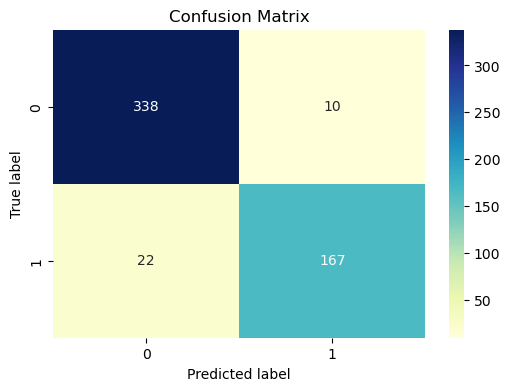

Gradient Boosting test confusion_matrix


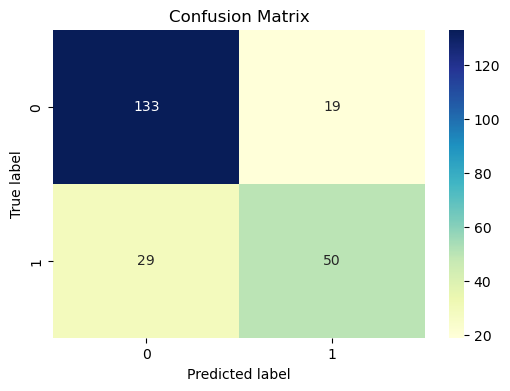

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_pp, y_train)
y_predict_train_gb = gradient_boosting.predict(X_train_pp)
y_predict_test_gb = gradient_boosting.predict(X_test_pp)

print("Gradient Boosting Train accuracy_score:", accuracy_score(y_train, y_predict_train_gb))
print("Gradient Boosting Train f1_score:", f1_score(y_train, y_predict_train_gb, average='weighted'))
print("Gradient Boosting Test accuracy_score:", accuracy_score(y_test, y_predict_test_gb))
print("Gradient Boosting Test f1_score:", f1_score(y_test, y_predict_test_gb, average='weighted'))

print("Gradient Boosting train confusion_matrix")
cm_gb_train = confusion_matrix(y_train, y_predict_train_gb)
draw_confusion_matrix(cm_gb_train)

print("Gradient Boosting test confusion_matrix")
cm_gb_test = confusion_matrix(y_test, y_predict_test_gb)
draw_confusion_matrix(cm_gb_test)


## Naive Bayes

Naive Bayes Train accuracy_score: 0.7541899441340782
Naive Bayes Train f1_score: 0.7495376746777264
Naive Bayes Test accuracy_score: 0.7792207792207793
Naive Bayes Test f1_score: 0.7757270925570774
Naive Bayes train confusion_matrix


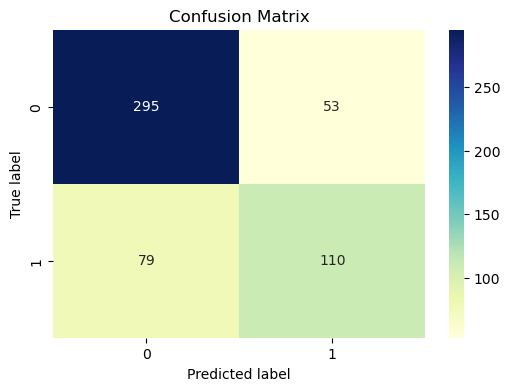

Naive Bayes test confusion_matrix


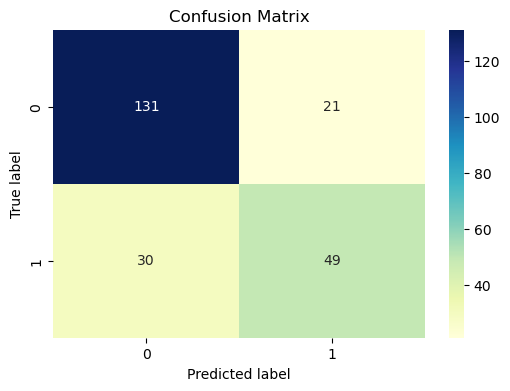

In [22]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

naive_bayes.fit(X_train_pp, y_train)

y_predict_train_nb = naive_bayes.predict(X_train_pp)
y_predict_test_nb = naive_bayes.predict(X_test_pp)

print("Naive Bayes Train accuracy_score:", accuracy_score(y_train, y_predict_train_nb))
print("Naive Bayes Train f1_score:", f1_score(y_train, y_predict_train_nb, average='weighted'))
print("Naive Bayes Test accuracy_score:", accuracy_score(y_test, y_predict_test_nb))
print("Naive Bayes Test f1_score:", f1_score(y_test, y_predict_test_nb, average='weighted'))

print("Naive Bayes train confusion_matrix")
cm_nb_train = confusion_matrix(y_train, y_predict_train_nb)
draw_confusion_matrix(cm_nb_train)

print("Naive Bayes test confusion_matrix")
cm_nb_test = confusion_matrix(y_test, y_predict_test_nb)
draw_confusion_matrix(cm_nb_test)


## DecisionTreeClassifier

Decision Tree Train accuracy_score:  1.0
Decision Tree Train f1_score:  1.0
Decision Tree Test accuracy_score:  0.6753246753246753
Decision Tree Test f1_score:  0.6737690175748388
Decision Tree train confusion_matrix 


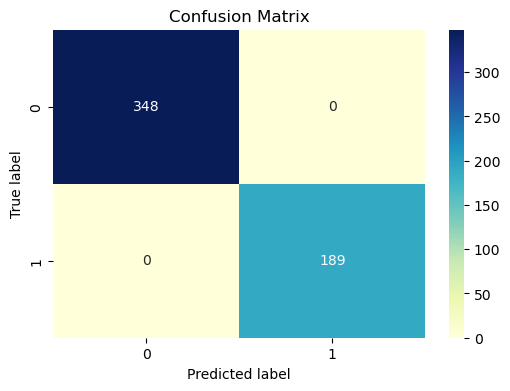

Decision Tree test confusion_matrix 


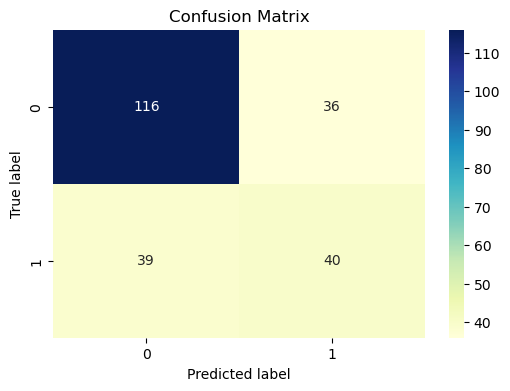

In [23]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train_pp, y_train)

y_predict_train_dt = dt.predict(X_train_pp)
y_predict_test_dt =  dt.predict(X_test_pp)

print("Decision Tree Train accuracy_score: " ,accuracy_score(y_train, y_predict_train_dt))
print("Decision Tree Train f1_score: " ,f1_score(y_train, y_predict_train_dt, average='weighted'))
print("Decision Tree Test accuracy_score: " ,accuracy_score(y_test, y_predict_test_dt))
print("Decision Tree Test f1_score: " ,f1_score(y_test, y_predict_test_dt, average='weighted'))

print("Decision Tree train confusion_matrix ")
cm_dt = confusion_matrix(y_train, y_predict_train_dt)
draw_confusion_matrix(cm_dt)
print("Decision Tree test confusion_matrix ")
cm_dt = confusion_matrix(y_test, y_predict_test_dt)
draw_confusion_matrix(cm_dt)

## random forrest

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=1000,n_jobs=-1)
RF.fit(X_train_pp, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=1000,
                       n_jobs=-1)

In [25]:
y_predict_train = RF.predict(X_train_pp)
y_predict_test =  RF.predict(X_test_pp)

print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  1.0
Train f1_score:  1.0
Test accuracy_score:  0.7835497835497836
Test f1_score:  0.7777925254340348


train confusion_matrix 


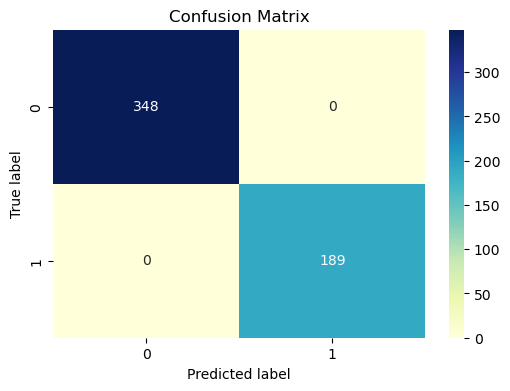

test confusion_matrix 


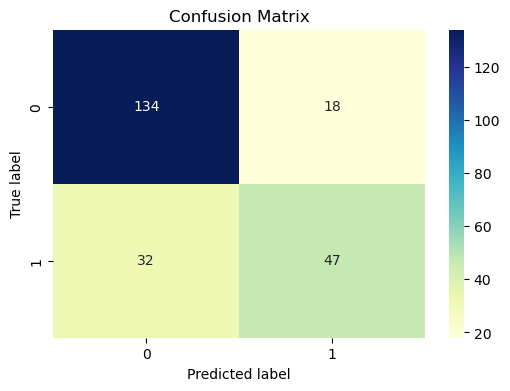

In [26]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

## xgboost

XGBoost Train accuracy_score:  1.0
XGBoost Train f1_score:  1.0
XGBoost Test accuracy_score:  0.7402597402597403
XGBoost Test f1_score:  0.7333510305208418
XGBoost train confusion_matrix 


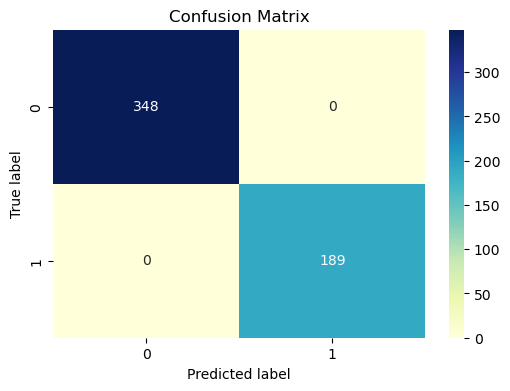

XGBoost test confusion_matrix 


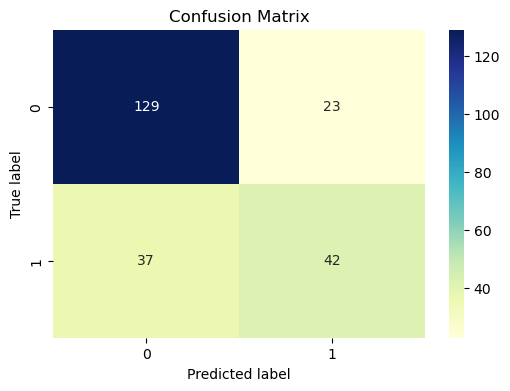

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_pp, y_train)

y_predict_train_xgb = xgb.predict(X_train_pp)
y_predict_test_xgb =  xgb.predict(X_test_pp)

print("XGBoost Train accuracy_score: " ,accuracy_score(y_train, y_predict_train_xgb))
print("XGBoost Train f1_score: " ,f1_score(y_train, y_predict_train_xgb, average='weighted'))
print("XGBoost Test accuracy_score: " ,accuracy_score(y_test, y_predict_test_xgb))
print("XGBoost Test f1_score: " ,f1_score(y_test, y_predict_test_xgb, average='weighted'))

print("XGBoost train confusion_matrix ")
cm_xgb = confusion_matrix(y_train, y_predict_train_xgb)
draw_confusion_matrix(cm_xgb)
print("XGBoost test confusion_matrix ")
cm_xgb = confusion_matrix(y_test, y_predict_test_xgb)
draw_confusion_matrix(cm_xgb)

## Saving the model

In [ ]:
import joblib

joblib.dump(logistic_regression, 'model.joblib')